# NAC3 - Aprendizado de maquina

| Nome dos Integrantes     | RM             | Turma   |
| :----------------------- | :------------- | :-----: |
| Integrante 1             | RM             |         |
| Integrante 2             | RM             |         |


## Data de entrega final

Será considerado para avaliação e correção o ultimo commit do `** dia 11/09 (domingo) **`

`O grupo deve responder ao Google forms` : [https://forms.gle/EEYUkZiWcJ6Xduah6](https://forms.gle/EEYUkZiWcJ6Xduah6)


## Rubrica 

Os critérios de avaliação do projeto será conforme a rubrica.


- R1: Exploração de Dados (Até 1 ponto)
- R2: Preparação de Dados (Até 2 ponto)
- R3: Desenvolvimento do Modelo (Até 1 ponto)
- R4: Treinamento e Teste do Modelo (Até 2 ponto)
- R5: Validação e Otimização do Modelo (Até 3 ponto)
- R6: Conclusões Finais (Até 1 ponto)
- R7: Deploy (Até 2 pontos *extra) 

Nota_final = R1 + R2 + R3 + R4 + R5 + R6 + R7


``Siga todas as instruções deste noteboook, mas não limite suas análises apenas ao conteúdo visto em aula.``


Nas celulas **Seu Código aqui...** significa que é necessário realizar a implementação de algum código. Utilize quantos blocos julgar necessário para criar o código de resposta.

Nas celulas **Responda** significa que é nessário uma resposta clara e objetiva (pode ser por texto, gráfico, imagem...) para a pergunta.

**Respeite a rubrica e não responda fora de ordem ou sequência**



## Análise preditiva de doeça cardíaca em pacientes

![](coracao.jpg)



Vamos trabalhar com um CONJUNTO DE DADOS DE DOENÇA CARDÍACA afim de ``predizer a presença ou não de doenças do coração em pacientes``.    

[dataset: https://ieee-dataport.org/open-access/heart-disease-dataset-comprehensive](https://ieee-dataport.org/open-access/heart-disease-dataset-comprehensive).


## 1. Exploração de Dados

Carregue o dataset e faça uma visualização das primeiras linhas (identificação básica apenas confirmar se a base foi carregada corretamente).


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline

In [3]:
df = pd.read_csv("heart_statlog_cleveland_hungary_final2.csv")

In [4]:
df.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,class
0,40,male,2,140,289,0,0,172,no,0,1,Normal
1,49,female,3,160,180,0,0,156,no,10,2,heart disease
2,37,male,2,130,283,0,1,98,no,0,1,Normal
3,48,female,4,138,214,0,0,108,yes,15,2,heart disease
4,54,male,3,150,195,0,0,122,no,0,1,Normal


In [5]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()

df['sex'] = labelencoder.fit_transform(df['sex'])

df.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,class
0,40,1,2,140,289,0,0,172,no,0,1,Normal
1,49,0,3,160,180,0,0,156,no,10,2,heart disease
2,37,1,2,130,283,0,1,98,no,0,1,Normal
3,48,0,4,138,214,0,0,108,yes,15,2,heart disease
4,54,1,3,150,195,0,0,122,no,0,1,Normal


**Pergunta:** Apresente (Escreva) uma descrição dos atributos (colunas) e seu significado:

Exemplo: 

- id: Representa o fabricante
- fuel_type: tipo de combustível (pode ser Gasolina ou Disel)
- price: Representa o valor do carro (**Variável Alvo, atributo que será predito pelo modelo de ML**)

![Documentacao](documentacaoTabela.PNG)
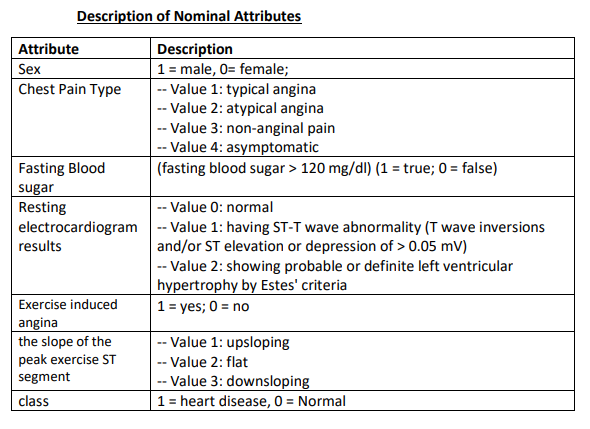

### Análise profunda dos dados

Faça uma análise exploratória dos dados. Utilize-se de gráficos e tabelas auxiliares, faça correlações entre os atributos para compreeder a natureza do problema.

# Contando o número de pessoas por sexo que possuem doenças no coração

In [6]:
dfProblemaSexo = df[['class', 'sex']]
dfProblemaSexoRename = dfProblemaSexo.rename(columns={'class': 'doenca'})
n = dfProblemaSexoRename[(dfProblemaSexoRename.sex == 1) & (dfProblemaSexoRename.doenca == 'heart disease')].count().sex
print("Número de pessoas do sexo masculino com doenças cardíacas: " + str(n))



Número de pessoas do sexo masculino com doenças cardíacas: 559


In [7]:
dfProblemaSexo = df[['class', 'sex']]
dfProblemaSexoRename = dfProblemaSexo.rename(columns={'class': 'doenca'})
n = dfProblemaSexoRename[(dfProblemaSexoRename.sex == 0) & (dfProblemaSexoRename.doenca == 'heart disease')].count().sex
print("Número de pessoas do sexo feminino com doenças cardíacas: " + str(n))



Número de pessoas do sexo feminino com doenças cardíacas: 70


# Contando o número de pessoas por sexo que possuem o indice açucar no sangue > 120 mg/dl

In [13]:
dfProblemaSexo = df[['fasting blood sugar', 'sex']]
dfProblemaSexoRename = dfProblemaSexo.rename(columns={'fasting blood sugar': 'sugar'})
n = dfProblemaSexoRename[(dfProblemaSexoRename.sex == 1) & (dfProblemaSexoRename.sugar == 1)].count().sex
print("Número de pessoas do sexo masculino com o indice açucar no sangue > 120 mg/dl: " + str(n))



Número de pessoas do sexo masculino com o indice açucar no sangue > 120 mg/dl: 217


In [14]:
dfProblemaSexo = df[['fasting blood sugar', 'sex']]
dfProblemaSexoRename = dfProblemaSexo.rename(columns={'fasting blood sugar': 'sugar'})
n = dfProblemaSexoRename[(dfProblemaSexoRename.sex == 0) & (dfProblemaSexoRename.sugar == 1)].count().sex
print("Número de pessoas do sexo feminino com o indice açucar no sangue > 120 mg/dl: " + str(n))



Número de pessoas do sexo feminino com o indice açucar no sangue > 120 mg/dl: 37


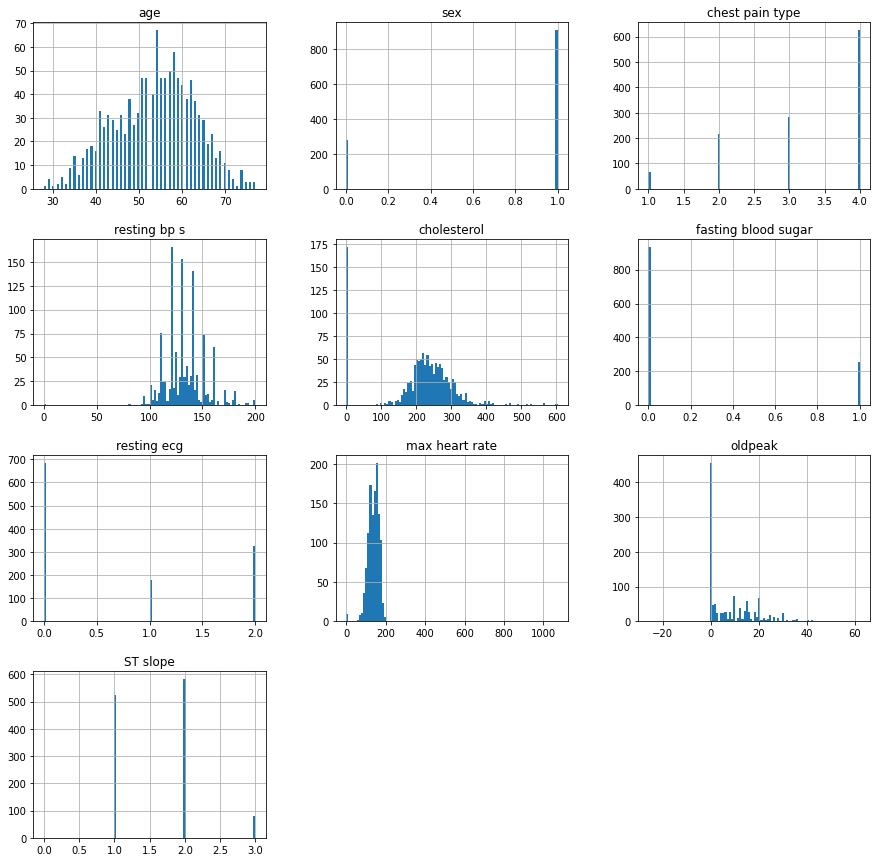

In [249]:
df.hist(bins=100, figsize=(15, 15))
plt.show()

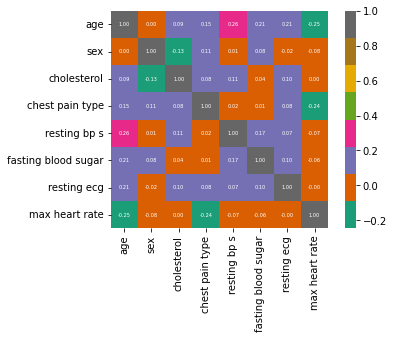

In [266]:
cols = ['age', 'sex', 'cholesterol', 'chest pain type', 'resting bp s', 'fasting blood sugar', 'resting ecg', 'max heart rate']
corr_matx = df[cols].corr()
heatmap = sns.heatmap(corr_matx,cbar=True,annot=True,square=True,fmt='.2f',annot_kws={'size': 5},yticklabels=cols,xticklabels=cols,cmap='Dark2')

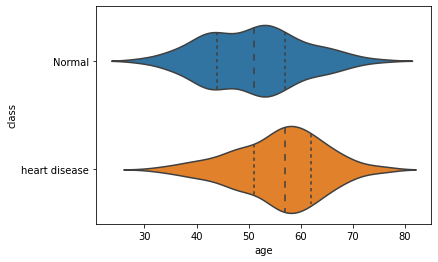

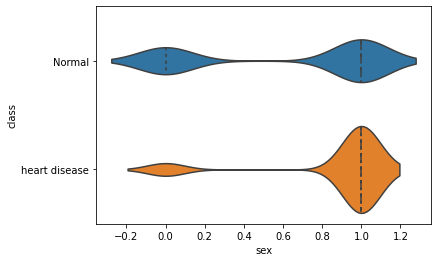

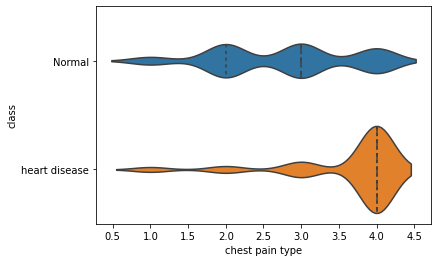

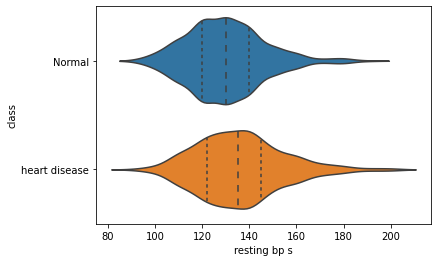

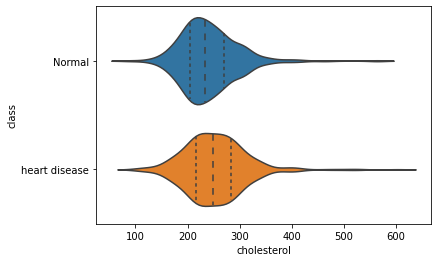

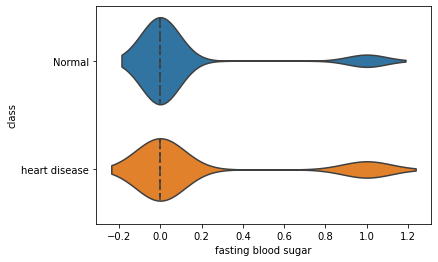

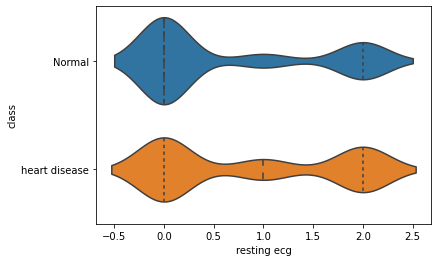

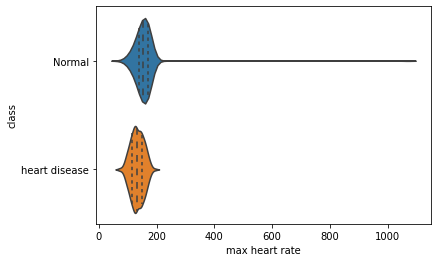

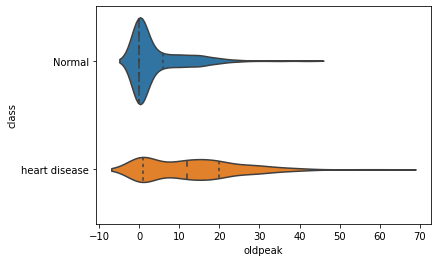

In [262]:
g = sns.violinplot(y='class', x='age', data=df, inner='quartile')
plt.show()
g = sns.violinplot(y='class', x='sex', data=df, inner='quartile')
plt.show()
g = sns.violinplot(y='class', x='chest pain type', data=df, inner='quartile')
plt.show()
g = sns.violinplot(y='class', x='resting bp s', data=df, inner='quartile')
plt.show()
g = sns.violinplot(y='class', x='cholesterol', data=df, inner='quartile')
plt.show()
g = sns.violinplot(y='class', x='fasting blood sugar', data=df, inner='quartile')
plt.show()
g = sns.violinplot(y='class', x='resting ecg', data=df, inner='quartile')
plt.show()
g = sns.violinplot(y='class', x='max heart rate', data=df, inner='quartile')
plt.show()
g = sns.violinplot(y='class', x='oldpeak', data=df, inner='quartile')
plt.show()

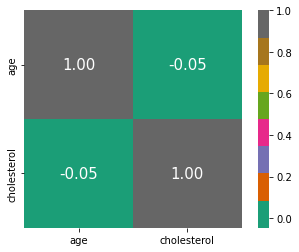

In [250]:
cols = ['age', 'cholesterol']
corr_matx = df[cols].corr()
heatmap = sns.heatmap(corr_matx,cbar=True,annot=True,square=True,fmt='.2f',annot_kws={'size': 15},yticklabels=cols,xticklabels=cols,cmap='Dark2')

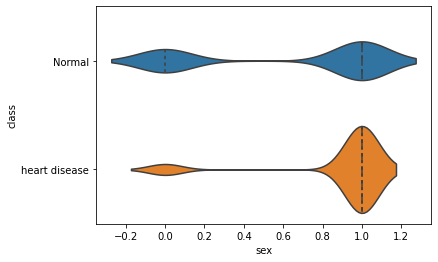

In [251]:
g = sns.violinplot(y='class', x='sex', data=df, inner='quartile')
plt.show()

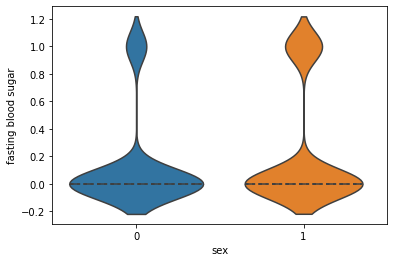

In [252]:
g = sns.violinplot(y='fasting blood sugar', x='sex', data=df, inner='quartile')
plt.show()

**Perguntas:** 

1. Qual a relação entre a idade e colesterol?
2. O indice açucar no sangue > 120 mg/dl é mais frequênte em homens ou mulheres?
3. Qual a distribuição de idade do dataset?
4. Pessoas com presença de doença cardiaca são em sua maioria do grupo masculino ou feminino? 

**Respostas:**

1. Correlação desprezível. A relação entre idade e colesterol está em -0.05, entrando no grupo de correlações desprezíveis(0>X<0.3).
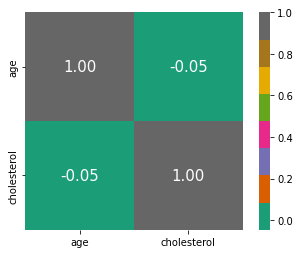
2. O sexo masculino possuí 23,87% das pessoas com doenças cardíacas(217 de 909). O sexo feminino possuí 13.16% das pessoas com doenças cardíacas(37 de 281).
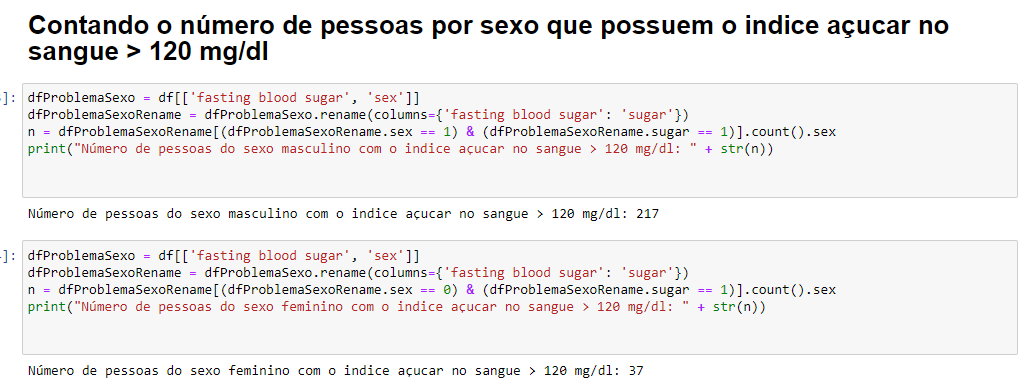
3. Segue em anexo a distribuição de idades em um gráfico de frequência
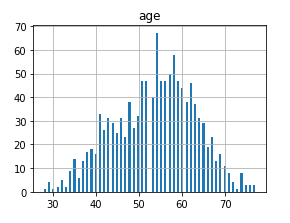
4. O sexo masculino possuí 69% das pessoas com doenças cardíacas(559 de 909). O sexo feminino possuí 24.90% das pessoas com doenças cardíacas(70 de 281).
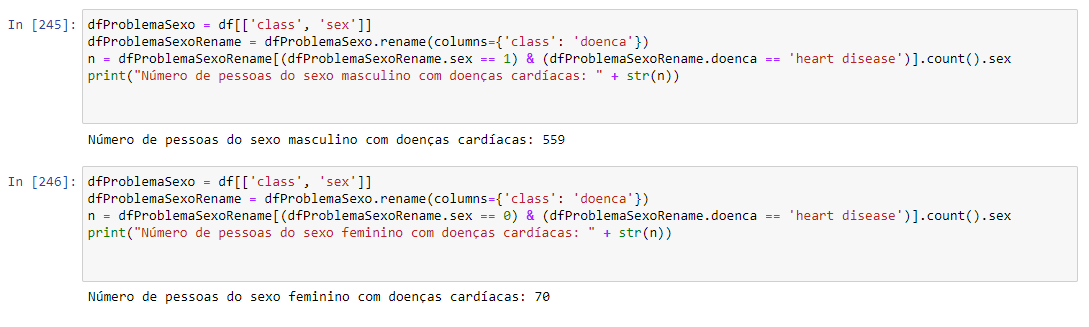


## 2. Preparação dos Dados

**Lembre-se:** Trate esses dados dentro do contexto do problema. ``Justifique suas escolhas``.

### Análise de valores inválidos

Faça a análise de dados ausente, dados nulos e dados iguais a 0(zero).

In [253]:
#Dados nulos ou ausentes
df.isnull().sum()


age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
class                  0
dtype: int64

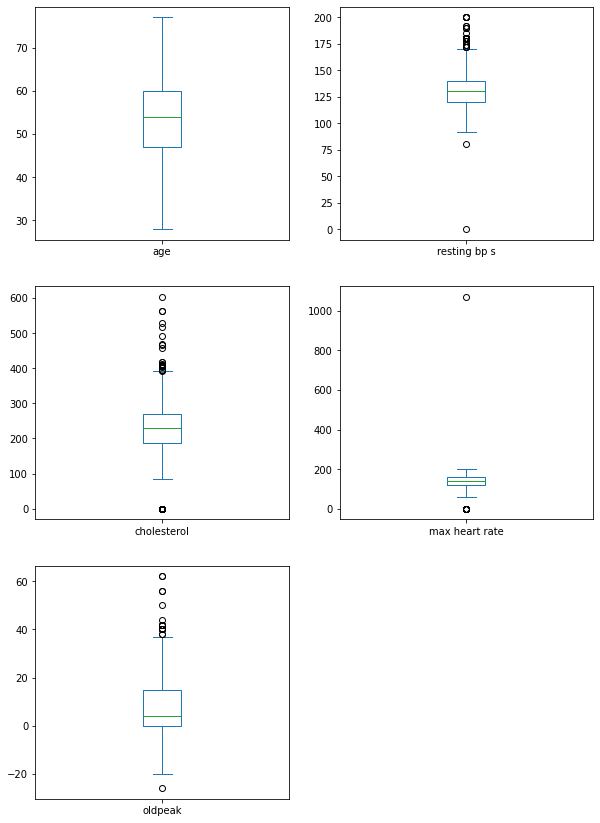

In [254]:
#Dados iguais a zero
dfOutliers = df[['age', 'resting bp s', 'cholesterol', 'max heart rate', 'oldpeak']]
dfOutliers.plot(kind='box', subplots=True, layout=(6,2), sharex=False, sharey=False, figsize=(10, 30))
plt.show()

## Removendo dados iguais a zero

In [16]:
#Removendo resting blood pressure iguais a zero
indexNames = df[ (df['resting bp s'] == 0)].index
df.drop(indexNames , inplace=True)

#Removendo serum cholesterol iguais a zero
indexNames = df[ (df['cholesterol'] == 0)].index
df.drop(indexNames , inplace=True)

#Removendo maximum heart rate achieved iguais a zero
indexNames = df[ (df['max heart rate'] == 0)].index
df.drop(indexNames , inplace=True)

**Pergunta:** Foram localizados dados ausente, dados nulos e dados iguais a 0(zero)? Se existe, como foram tratados (removidos ou mantidos ou substituidos ou ....)? 

**Resposta:**

Ausentes e nulos: Não encontrados

Dados iguais a zero: As linhas que possuiam colunas com dados zerados e que estavam indo contra algo ralemnte possível na vida real, foram deletadas.

### Análise de Outliers

Faça a análise de outliers.

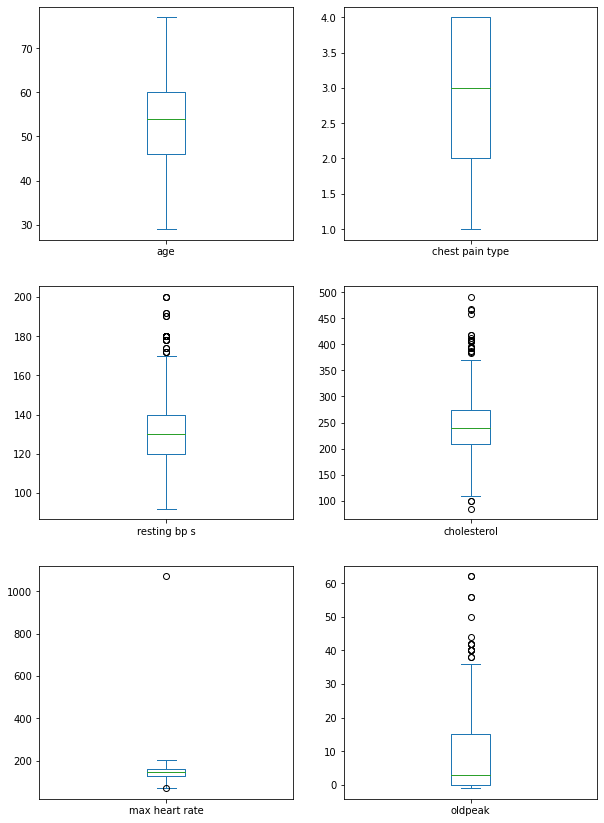

In [17]:
dfOutliers = df[['age', 'chest pain type', 'resting bp s', 'cholesterol', 'max heart rate', 'oldpeak']]
dfOutliers.plot(kind='box', subplots=True, layout=(6,2), sharex=False, sharey=False, figsize=(10, 30))
plt.show()

## Removendo valores muito altos

In [18]:
#Removendo cholesterol maiores que 450 mg / dL
indexNames = df[ (df['cholesterol'] > 450)].index
df.drop(indexNames , inplace=True)

**Pergunta:** Foram localizados outliers? Se existe, como os dados foram tratados (removidos ou mantidos)? 

**Resposta:**


Foram localizados. 

Os outliers zerados foram removidos, pois foram considerados erros de digitação em certas situações.

Os outliers com valores impossíveis, foram removidos. Um exemplo de valor impossível, é o cholesterol em 600 mg / dL.

## Resultados das análises

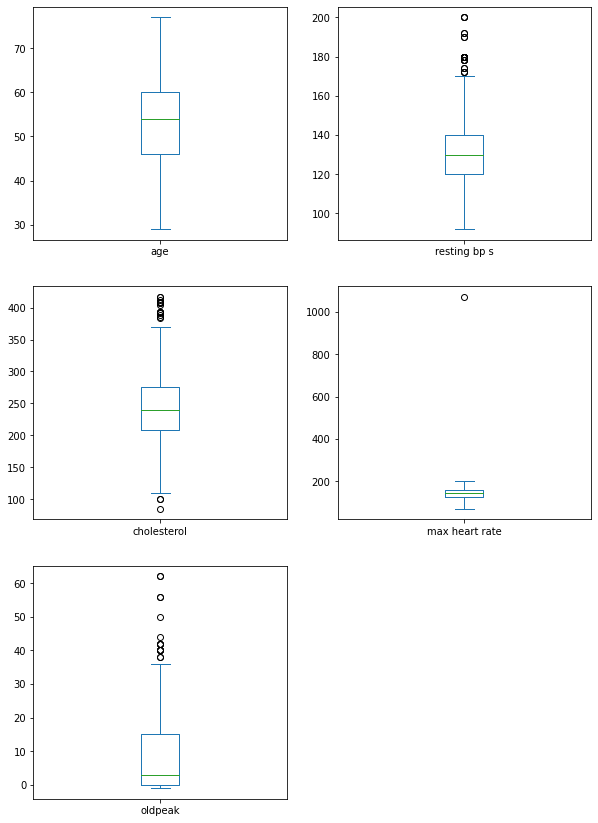

In [19]:
dfOutliers = df[['age', 'resting bp s', 'cholesterol', 'max heart rate', 'oldpeak']]
dfOutliers.plot(kind='box', subplots=True, layout=(6,2), sharex=False, sharey=False, figsize=(10, 30))
plt.show()

### Tratamento de dados Paramétricos

Faça o tratamento dos atributos categoricos, se existir. Manipule de forma conveniente para ser interpretado como um dado numérico.

In [9]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()

df['sex'] = labelencoder.fit_transform(df['sex'])

df.head()

**Pergunta:** Quais são os atributos categoricos? Qual foi a técnica de preprocessamento utilizada? 

**Resposta:**

Atributos: Sexo(sex)

Normalização Min-Máx: transforma os dados em um escala linear entre 0 e 1

### Normalização dos dados

Faça a manipulação adequada para normalizar os dados, se necessário.

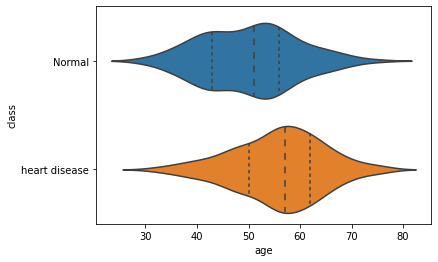

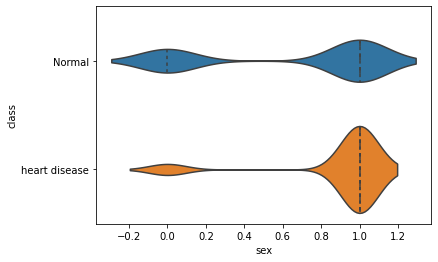

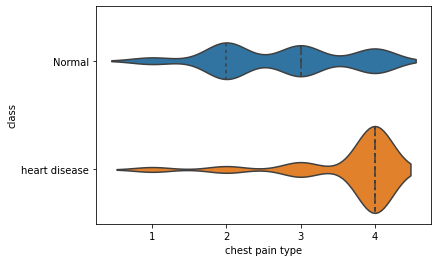

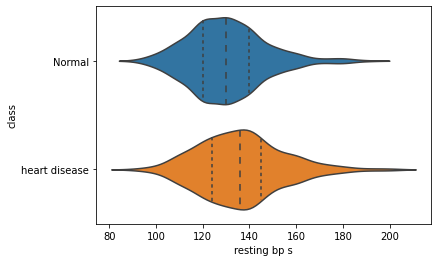

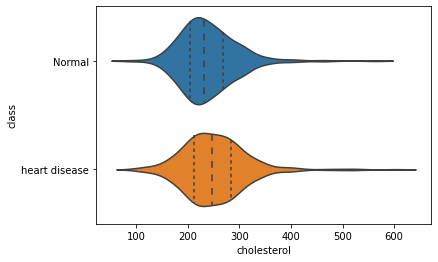

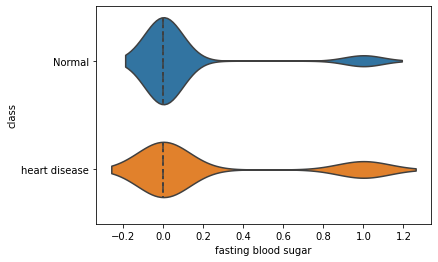

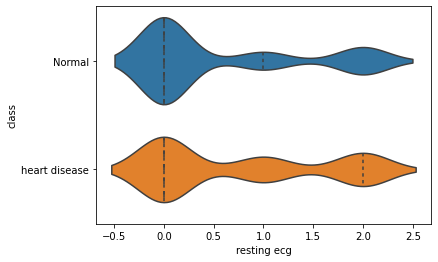

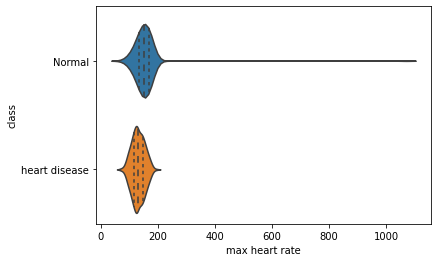

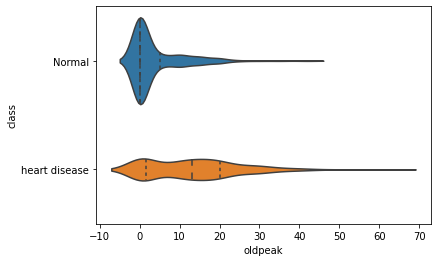

In [269]:
#Seu Código aqui...
df = df.drop_duplicates()

g = sns.violinplot(y='class', x='age', data=df, inner='quartile')
plt.show()
g = sns.violinplot(y='class', x='sex', data=df, inner='quartile')
plt.show()
g = sns.violinplot(y='class', x='chest pain type', data=df, inner='quartile')
plt.show()
g = sns.violinplot(y='class', x='resting bp s', data=df, inner='quartile')
plt.show()
g = sns.violinplot(y='class', x='cholesterol', data=df, inner='quartile')
plt.show()
g = sns.violinplot(y='class', x='fasting blood sugar', data=df, inner='quartile')
plt.show()
g = sns.violinplot(y='class', x='resting ecg', data=df, inner='quartile')
plt.show()
g = sns.violinplot(y='class', x='max heart rate', data=df, inner='quartile')
plt.show()
g = sns.violinplot(y='class', x='oldpeak', data=df, inner='quartile')
plt.show()

**Pergunta:** Os dados foram normalizados? Qual foi a técnica de preprocessamento utilizada? 

**Resposta:**

Sua resposta aqui.....

## 3. Desenvolvimento do Modelo

**Pergunta:** O conjunto de dados indica a aplicação de qual modelo de aprendizagem de maquina? 

**Resposta:**

    [ ] Aprendizado por reforço
    [X] Aprendizado supervisionado
    [ ] Aprendizado não supervisionado

**Pergunta:** Qual a técnica sugerida para este projeto?

**Resposta:**

    [ ] Regressão
    [X] Classificação
    [ ] Clusterização

**Pergunta:** Escolha 3 modelos de algoritmos de ML para ser testado.

**Resposta:**

1. algoritimo ...KNN
2. algoritimo ...___________
3. algoritimo ...___________


**Pergunta:** Explique como cada algoritmo funciona.



**Resposta:**

1. algoritimo ...___________ 
2. algoritimo ...___________
3. algoritimo ...___________

### Dataset dos dados tratados 

Crie um subset dos dados apenas com os atributos que serão utilizados e exiba as primeiras linhas.

In [20]:
entradas = df[['chest pain type', 'oldpeak']]
classes = df['class']
entradas.head()



,chest pain type,oldpeak
0,2,0
1,3,10
2,2,0
3,4,15
4,3,0


### Definição de X e Y

Separe os subsets dos atributos em Y e X :

- Y = atributo dependente (alvo)
- X = Atributo independente (entradas)

### Divisão em treino e teste.

Faça o split do dados para treinamento e teste

In [306]:
#Seu Código aqui...
from sklearn.model_selection import train_test_split

entradas_treino, entradas_teste, classes_treino, classes_teste = train_test_split(entradas, classes, test_size=0.2)

print(f"Formato das tabelas de dados de treino {entradas_treino.shape} e teste {entradas_teste.shape}")

entradas_treino.head()

Formato das tabelas de dados de treino (592, 2) e teste (149, 2)


,chest pain type,oldpeak
639,4,12
247,3,15
292,2,10
61,3,0
637,4,26


## 4. Treinamento e teste do modelo

Defina a métrica de performance para avaliação dos modelos de ML

**Resposta:**


Sua resposta aqui.......

### Treinamento e teste

Faça o treinamento e teste de dos 3 algoritmos escolhidos, aplique no treinamento a validação cruzada para um kfold de 5.

### Algoritmo 1

In [307]:
from sklearn.neighbors import KNeighborsClassifier

# Cria o classificar KNN
k = 15
modelo = KNeighborsClassifier(n_neighbors=k)

# Cria o modelo de machine learning
modelo.fit(entradas_treino, classes_treino)


from sklearn.metrics import accuracy_score
acertos = accuracy_score(classes_teste, classes_encontradas)
print("Acerto médio de classificação: ", acertos)



Acerto médio de classificação:  0.5302013422818792


### Algoritmo 2

In [10]:
#Seu Código aqui...



### Algoritmo 3

In [17]:
#Seu Código aqui...


Sumarize na tabela abaixo os resultados obtidos dos modelos de ML para o conjuntos de dados de treino e de testes

**Resposta:**

|                     | algoritmo1 | algoritmo2 | algoritmo3 |
|:---------------------|:------------------:|:-----------------------------:|:-----------------:|
| treino |      X           |      X                       |   X              |
| teste  |      X            |      X                       |   X              |


**Pergunta:** Qual foi a performance de cada algoritmo? Explique os resultados e detalhe como a característica de cada algoritmo influenciou no resultado.

**Resposta:**

## 5. Validação e Otimização do Modelo

Faça a otimização dos modelos, tunning dos hiperparametros, utilize uma das técinicas: **RandomSearchCV** ou **GridSearchCV**.


Após a otimização dos parametros, treine novamente os 3 algoritmos de ML  utilizando os parametos de otimização e compares seus resultados.


**Pergunta:** Qual a técnica escolhida? Por que?

**Resposta:**

### Algoritmo 1

In [351]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier

entradas = df[['chest pain type', 'oldpeak']]
classes = df['class']

entradas_treino, entradas_teste, classes_treino, classes_teste = train_test_split(entradas, classes, test_size=0.2)

clf = AdaBoostClassifier()

grid = GridSearchCV(estimator = clf,
                    param_grid = entradas,
                    scoring = 'f1',
                    cv = 60)    

# Cria o classificar KNN
k = 15
grid = KNeighborsClassifier(n_neighbors=k)

# Cria o modelo de machine learning
grid.fit(entradas_treino, classes_treino)


from sklearn.metrics import accuracy_score
acertos = accuracy_score(classes_teste, classes_encontradas)
print("Acerto médio de classificação: ", acertos)




Acerto médio de classificação:  0.5436241610738255


### Algoritmo 2

In [10]:
#Seu Código aqui...



### Algoritmo 3

In [17]:
#Seu Código aqui...


Sumarize na tabela abaixo os resultados obtidos dos modelos de ML para o conjuntos de dados de treino e de testes

**Resposta:**

|                     | algoritmo1 | algoritmo2 | algoritmo3 |
|:---------------------|:------------------:|:-----------------------------:|:-----------------:|
| treino |      X           |      X                       |   X              |
| teste  |      X            |      X                       |   X              |


**Pergunta:** Qual dos algoritmos obteve os melhores resultados? Quais caracaterísticas deste algoritmo podem ajudar a justificar tal resultado?

**Resposta:**

## Salvando o modelo desenvolvido

Configure o modelo selecionado com os parâmetros otimizados obtidos anteriormente e salve

```python
# exemplo de como salvar o modelo "model" no arquivo "modelsave.pkl"

# import lib
import pickle

# salvar
with open('modelsave.pkl', 'wb') as file:
    pickle.dump(model, file)

```

In [26]:
#Seu Código aqui...



## 6. Conclusões finais

Ufa!!... Chegamos ao final deste projeto. Parabéns! De forma simplificada e completa passamos por todas as etapas de aprendizado de maquina. Outras etapas podem ser adicionadas no tratamento dos dados e desenvolvimento do modelo.

**Pergunta:**: O modelo desenvolvido obteve um resultado satisfatório? Justifique:

**Resposta**:

**Pergunta:**: O que faria diferente para melhorar resultado obtido? Justifique:

**Resposta**:

**Pergunta:**: As etapas de desenvolvimento se aplicam para um problema de classificação? Justifique:

**Resposta**:

## 7. Deploy 

Etapa bonûs (Até 2 pontos *extra)

Essa parte não é obrigatória, por esse motivo é considerada pontuação extra na nota para quem desenvolver.


Faça o deploy do modelo de ML desenvolvido em um webserver. Como sugestão utilize Flask ou FastAPI ou Django. Procure por referências na web.